In [15]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# --- Leitura dos dados ---
df = pd.read_excel("Seno.xlsx")
x = df["x"].values.reshape(-1, 1)
y = df["y"].values

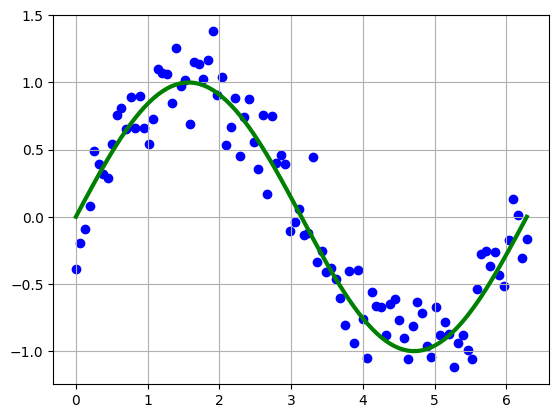

In [17]:
# --- Visualização inicial ---
plt.scatter(x, y, color="blue", label="Dados")
plt.plot(x, np.sin(x), color="green", linewidth=3, label="sin(x) referência")
plt.grid(True)

In [18]:
# --- Criação da rede neural (MLP) ---
model = Sequential()
model.add(Dense(6, input_dim=1, activation='tanh'))  # camada oculta com 6 neurônios
model.add(Dense(1, activation='linear'))             # saída linear para regressão

model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=5000, verbose=0)  # número de iterações (épocas)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# --- Previsão com a rede treinada ---
y_pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


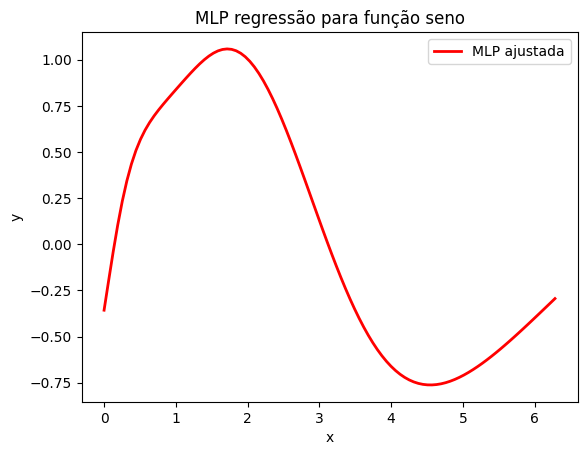

In [20]:
# --- Visualização do ajuste ---
plt.plot(x, y_pred, color="red", linewidth=2, label="MLP ajustada")
plt.xlabel("x")
plt.ylabel("y")
plt.title("MLP regressão para função seno")
plt.legend()
plt.show()

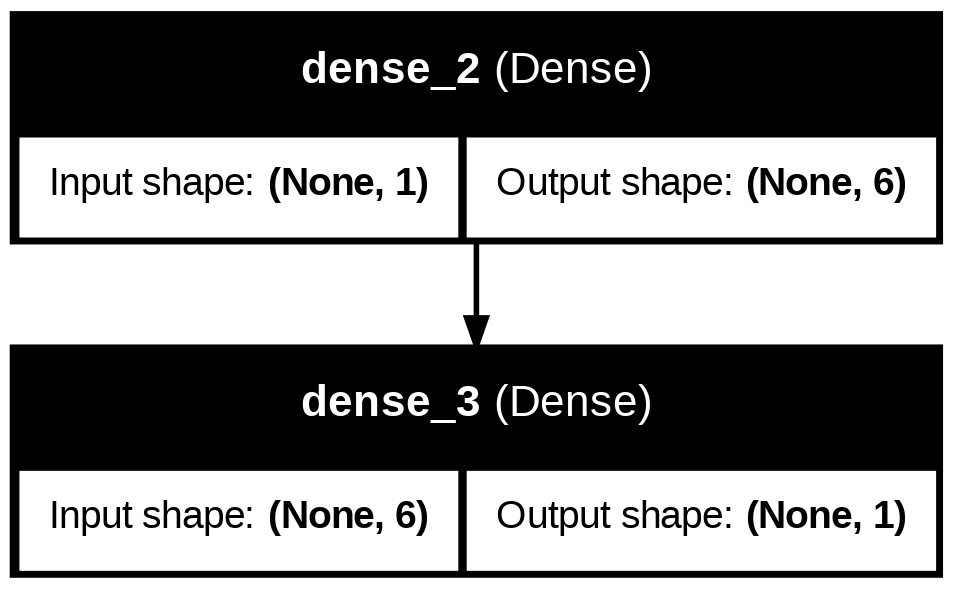

In [21]:
from tensorflow.keras.utils import plot_model

# --- Plota a arquitetura da rede ---
plot_model(model, to_file='mlp_architecture.png', show_shapes=True, show_layer_names=True)

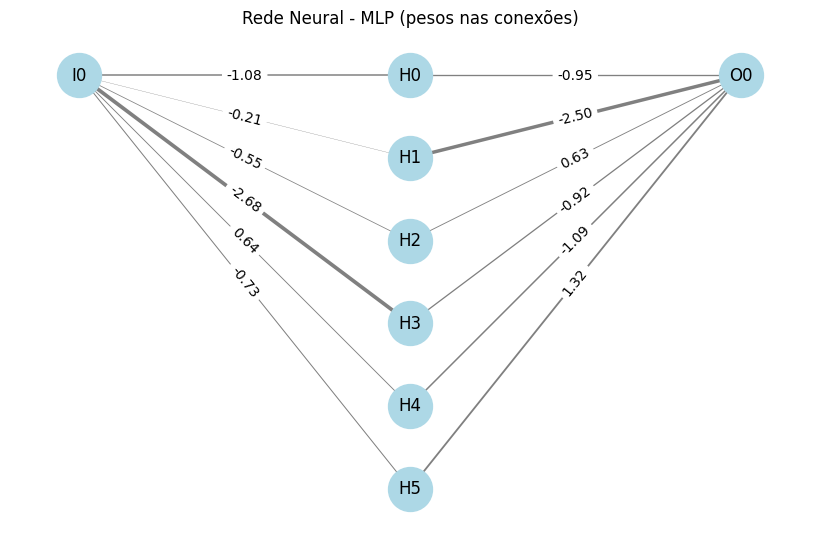

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Extrai os pesos e bias das camadas
pesos = model.get_weights()

# Usa a forma de entrada do modelo completo
num_input = model.input_shape[1]
num_hidden = model.layers[0].units
num_output = model.layers[1].units

# Cria grafo
G = nx.DiGraph()

# Adiciona nós
for i in range(num_input):
    G.add_node(f'I{i}', layer='input')
for h in range(num_hidden):
    G.add_node(f'H{h}', layer='hidden')
for o in range(num_output):
    G.add_node(f'O{o}', layer='output')

# Conexões da camada input->hidden
for i in range(num_input):
    for h in range(num_hidden):
        w = pesos[0][i, h]
        G.add_edge(f'I{i}', f'H{h}', weight=w)

# Conexões da camada hidden->output
for h in range(num_hidden):
    for o in range(num_output):
        w = pesos[2][h, o]
        G.add_edge(f'H{h}', f'O{o}', weight=w)

# Layout manual por camada
pos = {}
for i in range(num_input):
    pos[f'I{i}'] = (0, -i)
for h in range(num_hidden):
    pos[f'H{h}'] = (1, -h)
for o in range(num_output):
    pos[f'O{o}'] = (2, -o)

# Desenha
plt.figure(figsize=(8,5))
edges = G.edges()
weights = [abs(G[u][v]['weight']) for u,v in edges]
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000,
        arrows=False, width=weights, edge_color='gray')

# Mostra os pesos
edge_labels = {(u,v): f"{G[u][v]['weight']:.2f}" for u,v in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Rede Neural - MLP (pesos nas conexões)")
plt.show()